# Fire_scar_pipeline_v1

In [27]:
import osgeo.gdal as gdal
import os
from osgeo import ogr

# this sets the environmental variables for the prj folders 
# https://stackoverflow.com/questions/56764046/gdal-ogr2ogr-cannot-find-proj-db-error


os.environ['PROJ_LIB'] =  r'C:\ProgramData\Anaconda3\envs\geo_env\Library\share\proj'
os.environ['GDAL_DATA'] = r'C:\ProgramData\Anaconda3\envs\geo_env\Library\share'

In [28]:
import pandas as pd
import geopandas as gpd
import os
import shutil
import glob

import numpy as np
import rasterio as rio
import rasterio.plot
import pyproj

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
import fiona
import rasterstats
from rasterstats import zonal_stats

In [29]:
import fiona; fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [ ]:
# Import in the cadastre and ensure the crs is set to GDA94
"""cadastre = gpd.read_file(r'U:\LIB_Common\Cadastre\Datasets\Av_data\Cadastre.shp')
cadastre.head()
cadastre.crs"""


#read in an excel sheet with all of the property names
"""properties = pd.read_excel(r"\\pgb-bas01\DENR_Satellite_Imagery$\Scratch\Zonal_Stats_Pipeline\Copy of landsatZonalStatsTiles2.xlsx")
properties["Property"] = properties["Property"].str.upper()
prop_list = properties.Property.unique().tolist()

shapefile_list =[]"""

# create individual property shapefiles from a list
"""for i in prop_list:
    #To select rows whose column value equals a scalar, some_value, use ==:
    prop = cadastre[cadastre["PROP_NAME"]== i]
    prop.reset_index(drop=True, inplace=True)
    prop['uid']= prop.index + 1
    print (i)
    file_path = (r"\\pgb-bas01\DENR_Satellite_Imagery$\Scratch\Zonal_Stats_Pipeline\shapefiles\property\new\propertytest_" + str.lower(i) + "_GDA94.shp")
    shapefile_list.append(file_path)
    print(prop.crs)
    #prop.crs = {'init': 'EPSG:4283'}
    #prop_gda94 = prop
    print(prop.crs)
    fig, ax = plt.subplots(figsize = (10,10))
    prop.plot(ax=ax)
    plt.show()
    prop.to_file(file_path, driver = 'ESRI Shapefile')"""

In [ ]:
# Import in the cadastre and ensure the crs is set to GDA94
cadastre = gpd.read_file(r'U:\LIB_Common\Cadastre\Datasets\Av_data\Cadastre.shp')
cadastre.head()
cadastre.crs


#read in an excel sheet with all of the property names
properties = pd.read_excel(r"\\pgb-bas01\DENR_Satellite_Imagery$\Scratch\Zonal_Stats_Pipeline\Copy of landsatZonalStatsTiles2.xlsx")
properties["Property"] = properties["Property"].str.upper()
prop_list = properties.Property.unique().tolist()

shapefile_list =[]

# create individual property shapefiles from a list
for i in prop_list:
    #To select rows whose column value equals a scalar, some_value, use ==:
    prop = cadastre[cadastre["PROP_NAME"]== i]
    prop.reset_index(drop=True, inplace=True)
    prop['uid']= prop.index + 1
    print (i)
    file_path = (r"\\pgb-bas01\DENR_Satellite_Imagery$\Scratch\Zonal_Stats_Pipeline\shapefiles\property\new\property_" + str.lower(i) + "_GDA94.shp")
    shapefile_list.append(file_path)
    print(prop.crs)
    prop.crs = {'init': 'EPSG:4283'}
    prop_gda94 = prop
    print(prop_gda94.crs)
    fig, ax = plt.subplots(figsize = (10,10))
    prop_gda94.plot(ax=ax)
    plt.show()
    prop_gda94.to_file(file_path, driver = 'ESRI Shapefile')

In [ ]:
# Import in the cadastre and ensure the crs is set to GDA94
cadastre = gpd.read_file(r'U:\LIB_Common\Cadastre\Datasets\Av_data\Cadastre.shp')
#cadastre.head()
cadastre.crs

In [ ]:
df = gpd.read_file(r"\\pgb-bas01\DENR_Satellite_Imagery$\Scratch\Zonal_Stats_Pipeline\shapefiles\property\new\property_" + str.lower(i) + "_GDA94.shp")

In [ ]:
type(df)

In [ ]:
df.total_bounds

In [ ]:
df.crs

In [ ]:
df.crs = {'init': 'epsg:4283'}

In [ ]:
df.crs

In [ ]:
shapefile_list = ['\\\\pgb-bas01\\DENR_Satellite_Imagery$\\Scratch\\Zonal_Stats_Pipeline\\shapefiles\\property\\new\\property_middle creek_GDA94.shp',
 '\\\\pgb-bas01\\DENR_Satellite_Imagery$\\Scratch\\Zonal_Stats_Pipeline\\shapefiles\\property\\new\\property_montejinni east_GDA94.shp',
 '\\\\pgb-bas01\\DENR_Satellite_Imagery$\\Scratch\\Zonal_Stats_Pipeline\\shapefiles\\property\\new\\property_montejinni west_GDA94.shp',
 '\\\\pgb-bas01\\DENR_Satellite_Imagery$\\Scratch\\Zonal_Stats_Pipeline\\shapefiles\\property\\new\\property_murray downs_GDA94.shp',
 '\\\\pgb-bas01\\DENR_Satellite_Imagery$\\Scratch\\Zonal_Stats_Pipeline\\shapefiles\\property\\new\\property_riveren_GDA94.shp',
 '\\\\pgb-bas01\\DENR_Satellite_Imagery$\\Scratch\\Zonal_Stats_Pipeline\\shapefiles\\property\\new\\property_shenandoah_GDA94.shp',
 '\\\\pgb-bas01\\DENR_Satellite_Imagery$\\Scratch\\Zonal_Stats_Pipeline\\shapefiles\\property\\new\\property_shenandoah east_GDA94.shp',
 '\\\\pgb-bas01\\DENR_Satellite_Imagery$\\Scratch\\Zonal_Stats_Pipeline\\shapefiles\\property\\new\\property_todd river_GDA94.shp',
 '\\\\pgb-bas01\\DENR_Satellite_Imagery$\\Scratch\\Zonal_Stats_Pipeline\\shapefiles\\property\\new\\property_wave hill_GDA94.shp',
 '\\\\pgb-bas01\\DENR_Satellite_Imagery$\\Scratch\\Zonal_Stats_Pipeline\\shapefiles\\property\\new\\property_willeroo_GDA94.shp',
 '\\\\pgb-bas01\\DENR_Satellite_Imagery$\\Scratch\\Zonal_Stats_Pipeline\\shapefiles\\property\\new\\property_wongalara_GDA94.shp',
 '\\\\pgb-bas01\\DENR_Satellite_Imagery$\\Scratch\\Zonal_Stats_Pipeline\\shapefiles\\property\\new\\property_tennant creek_GDA94.shp',
 '\\\\pgb-bas01\\DENR_Satellite_Imagery$\\Scratch\\Zonal_Stats_Pipeline\\shapefiles\\property\\new\\property_bullo river_GDA94.shp',
 '\\\\pgb-bas01\\DENR_Satellite_Imagery$\\Scratch\\Zonal_Stats_Pipeline\\shapefiles\\property\\new\\property_yambah_GDA94.shp']

In [ ]:
for i in shapefile_list:
    i.strip()
    print(i)

## Working file - cleaning second attempt 8/10/2020

In [ ]:
for shape in shapefile_list:
    shape.strip()
    
    # check if the "temp_individual_bands" file already exists and delete it if it does.
    tempDir = 'temp_individual_bands'       
    try:
        shutil.rmtree(tempDir)

    except:
        print("The following directory was deleted: ", tempDir)

    # create temporary folders
    tempDir = 'temp_individual_bands'
    os.makedirs(tempDir)


    def listdir(dirname,endfilename,scratchDir):
        """
        this function will return a list of files in a directory for the given file extention "endfilename". 
        """
        list_img = []

        for root, dirs, files in os.walk(dirname):
            for file in files:
                if file.endswith(endfilename):
                    img = (os.path.join(root, file))
                    list_img.append(img)
                    #print (img)
                    shutil.copy(os.path.abspath(img), scratchDir)
        #print("Script has finished")
        return list_img

    dirname = r'U:\Working\Rangelands\Spatial Data\NAFI Firescars'
    endfilename = 'MTH.tif'
    scratchDir = r'C:\Users\rmcgr\Desktop\firemaps\scratch'

    listdir(dirname,endfilename,scratchDir)



    imlist = r"Z:\Scratch\Zonal_Stats_Pipeline\Firescars\NAFI_fire_rasters\fire_list.csv"
    shape = shape
    image_name =[]
    image_date =[]
    site_li =[]
    zoneclass =[]
    zoneresults =[]
    property_list = []

    #def mainRoutine():

    # read in the command arguments
    """cmdargs = getCmdargs()
    imlist = cmdargs.imlist
    nodata= int(cmdargs.nodata)
    shape = cmdargs.shape 
    uid = cmdargs.uid
    export_csv = cmdargs.csv""" 

    # check if the "temp_individual_bands" file already exists and delete it if it does.
    """tempDir = 'temp_individual_bands'       
    try:
        shutil.rmtree(tempDir)

    except:
        print("The following directory was deleted: ", tempDir)"""

    # create temporary folders
    #tempDir = 'temp_individual_bands'
    #os.makedirs(tempDir)

    with open(imlist, "r") as imagerylist:

        #Extract each image path from the image list
        for image in imagerylist:
            #print(image)

            # cleans the file pathway (Windows)
            imageS = image.rstrip()
            #print("imageS: ", imageS)
            im_name = imageS[60:]
            #print("Im_Name: ", im_name)

            # loops through each image
            with rasterio.open(imageS, nodata= 0) as srci:
                imageResults = 'image_' + im_name + '.csv'
                # runs the zonal stats function and outputs a csv in a band specific folder
                #finalresults = applyZonalstats(imageS, nodata, band, shape, uid)

                """--------------------------------------------------------------------------------------------------------------"""

                #def applyZonalstats(imageS, nodata, band, shape, uid):

                '''image_name =[]
                image_date =[]
                site_li =[]
                zoneclass =[]
                zoneresults =[]'''
                total_uid_list = []
                laiskey_list = []

                with rasterio.open(imageS, nodata=0) as srci:
                    affine = srci.transform #srci.transform is the new srci.affine
                    array = srci.read(1)
                    #print(array)
                    
                    with fiona.open(shape) as src:
                        # using "all_touched=True" will increase the number of pixels used to produce the stats "False" reduces the number

                        cmap = {1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
                        zs = zonal_stats(src, array, affine=affine, stats=['count'],categorical=True, 
                                         category_map=cmap, nodata = 0, all_touched=False)

                        # extract image name and append to list
                        imgName = str(srci)[86:-11]
                        #print("imgName: ", imgName)
                        image_name.append(imgName)
                        # extract image date and append to list
                        imgDate = str(imgName)[2:6]
                        #print("imgDate: ", imgDate)
                        image_date.append(imgDate)
                        
                        df  = pd.DataFrame.from_records(zs)
                        df.insert(0, 'image', imgName)
                        df.insert(0, 'year', imgDate)
                        
                        for i in src:
                            uid_list = []
                            # extract shapefile records
                            table_attributes = i['properties'] 
                            
                            laiskey_ = table_attributes["LAISKEY"]
                            laiskey_string = str(laiskey_)
                            laiskey_list.append(laiskey_string)
                            total_laiskey_list.append(laiskey_string)
                            #print("TOTAL_UID_LIST as it happens: ", total_uid_list)

                            prop = table_attributes["PROP_NAME"]
                            property_list.append(prop)
                            #print("UID_LIST: ", uid_list)

                            uid_ = table_attributes["uid"]
                            uid_string = str(uid_)
                            uid_list.append(uid_string)
                            total_uid_list.append(uid_string)

                    df['uid_final'] = total_uid_list
                    df['Laiskey'] = laiskey_list
                    print("TOTAL_UID_LIST: ", total_uid_list)

                    df['band']= 1
                    print("============================================================================")
                    print(df)
                    print("----------------------------------------------------------------------------")
                    df.to_csv(tempDir + '//' + imageResults, index=False) 

                    srci.close()

                    # print out the file name of the processed image
                    print (imgName + ' ' + imgDate +  ' ' + 'zone stats are complete')

                    #return(finalresults)

                    """--------------------------------------------------------------------------------------------------------"""

                    #RETURN TO MAIN FUNCTION

                    #header = ['number', 'site', 'min', 'max', 'mean', 'count']#, 'std', 'median'

                    """df  = pd.DataFrame.from_records(finalresults)
                    df['band']= band
                    df['image']= imgName
                    df['date']= imgDate
                    print("DF: ", df)
                    df.to_csv(tempDir + '//' + imageResults, index=False) """
                    # join the elements in each of the lists row by row 
                    #finalresults =  [uid_list + property_list + imU for siteid, zoneR, imU in zip(siteID, zonestats,image_Name)] 

                    property_name = shape.rstrip()
                    print("Property name: ", property_name)
                    clean_prop_name = property_name[98:-4]
                    print("Clean_Prop_Name: ", clean_prop_name)


    # for loops through the band folders and concatenates zonal stat outputs into a complete band specific csv   
    band_files = glob.glob(os.path.join(tempDir, "*.csv")) # advisable to use os.path.join as this makes concatenation OS independent
    df_from_each_band_file = (pd.read_csv(f) for f in band_files)
    concat_band_df   = pd.concat(df_from_each_band_file,ignore_index=False, axis=0, sort=False)
    #concat_band_df = concat_band_df.insert(0, 'property', prop)
    # export the band specific results to a csv file (i.e. three outputs)
    concat_band_df.to_csv(r"\\pgb-bas01\DENR_Satellite_Imagery$\Scratch\Zonal_Stats_Pipeline\Firescars\outputs" + '\\' + clean_prop_name + "_fire_scar.csv",index=False)

##Second attempt 8/10/2020 edit

Created lists for uid but still there are issues.

# This is working accross all shapefiles and has not been cleaned.

In [ ]:
for shape in shapefile_list:
    shape.strip()
    
    # check if the "temp_individual_bands" file already exists and delete it if it does.
    tempDir = 'temp_individual_bands'       
    try:
        shutil.rmtree(tempDir)

    except:
        print("The following directory was deleted: ", tempDir)

    # create temporary folders
    tempDir = 'temp_individual_bands'
    os.makedirs(tempDir)


    def listdir(dirname,endfilename,scratchDir):
        """
        this function will return a list of files in a directory for the given file extention "endfilename". 
        """
        list_img = []

        for root, dirs, files in os.walk(dirname):
            for file in files:
                if file.endswith(endfilename):
                    img = (os.path.join(root, file))
                    list_img.append(img)
                    #print (img)
                    shutil.copy(os.path.abspath(img), scratchDir)
        #print("Script has finished")
        return list_img

    dirname = r'U:\Working\Rangelands\Spatial Data\NAFI Firescars'
    endfilename = 'MTH.tif'
    scratchDir = r'C:\Users\rmcgr\Desktop\firemaps\scratch'

    listdir(dirname,endfilename,scratchDir)



    imlist = r"Z:\Scratch\Zonal_Stats_Pipeline\Firescars\NAFI_fire_rasters\fire_list.csv"
    shape = shape
    image_name =[]
    image_date =[]
    site_li =[]
    zoneclass =[]
    zoneresults =[]
    
    property_list = []



    #def mainRoutine():

    # read in the command arguments
    """cmdargs = getCmdargs()
    imlist = cmdargs.imlist
    nodata= int(cmdargs.nodata)
    shape = cmdargs.shape 
    uid = cmdargs.uid
    export_csv = cmdargs.csv""" 

    # check if the "temp_individual_bands" file already exists and delete it if it does.
    """tempDir = 'temp_individual_bands'       
    try:
        shutil.rmtree(tempDir)

    except:
        print("The following directory was deleted: ", tempDir)"""

    # create temporary folders
    #tempDir = 'temp_individual_bands'
    #os.makedirs(tempDir)

    with open(imlist, "r") as imagerylist:

        #Extract each image path from the image list
        for image in imagerylist:
            #print(image)

            # cleans the file pathway (Windows)
            imageS = image.rstrip()
            #print("imageS: ", imageS)
            im_name = imageS[60:]
            #print("Im_Name: ", im_name)

            # loops through each image
            with rasterio.open(imageS, nodata= 0) as srci:
                imageResults = 'image_' + im_name + '.csv'
                # runs the zonal stats function and outputs a csv in a band specific folder
                #finalresults = applyZonalstats(imageS, nodata, band, shape, uid)

                """--------------------------------------------------------------------------------------------------------------"""

                #def applyZonalstats(imageS, nodata, band, shape, uid):

                '''image_name =[]
                image_date =[]
                site_li =[]
                zoneclass =[]
                zoneresults =[]'''
                total_uid_list = []
                laiskey_list = []

                with rasterio.open(imageS, nodata=0) as srci:
                    affine = srci.transform #srci.transform is the new srci.affine
                    array = srci.read(1)
                    #print(array)
                    
                    

                    with fiona.open(shape) as src:
                        # using "all_touched=True" will increase the number of pixels used to produce the stats "False" reduces the number

                        cmap = {1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
                        zs = zonal_stats(src, array, affine=affine, stats=['count'],categorical=True, 
                                         category_map=cmap, nodata = 0, all_touched=False)

                        # extract image name and append to list
                        imgName = str(srci)[86:-11]
                        #print("imgName: ", imgName)
                        image_name.append(imgName)
                        # extract image date and append to list
                        imgDate = str(imgName)[2:6]
                        #print("imgDate: ", imgDate)
                        image_date.append(imgDate)
                        
                        df  = pd.DataFrame.from_records(zs)
                        df.insert(0, 'image', imgName)
                        df.insert(0, 'year', imgDate)
                        
                        for i in src:
                            uid_list = []
                            # extract shapefile records
                            table_attributes = i['properties'] 
                            
                            laiskey_ = table_attributes["LAISKEY"]
                            laiskey_string = str(laiskey_)
                            laiskey_list.append(laiskey_string)
                            total_laiskey_list.append(laiskey_string)
                            print("TOTAL_UID_LIST as it happens: ", total_uid_list)

                            prop = table_attributes["PROP_NAME"]
                            property_list.append(prop)
                            print("UID_LIST: ", uid_list)
                            #df['uid_test'] = uid_
                            
                            uid_ = table_attributes["uid"]
                            uid_string = str(uid_)
                            uid_list.append(uid_string)
                            total_uid_list.append(uid_string)

                        
                        print("============================================================================")
                        print(df)
                        print("----------------------------------------------------------------------------")
                        """uid_list = []
                        property_list = []

                        for i in src:

                            # extract shapefile records
                            table_attributes = i['properties'] 
                            
                            uid_ = table_attributes["uid"]
                            uid_string = str(uid_)
                            uid_list.append(uid_string)
                            #df.insert(0, 'site', prop)

                            prop = table_attributes["PROP_NAME"]
                            property_list.append(prop)
                            #df.insert(0, 'property', prop)"""

                    #df.insert(0, 'site', property_list)
                    #df.insert(0, 'property', prop)
                    #df.insert(0, 'site', uid_)
                    #df = df.append(pd.DataFrame(total_uid_list, columns=['uid']) axis=1)
                    df['uid_final'] = total_uid_list
                    df['Laiskey'] = laiskey_list
                    print("TOTAL_UID_LIST: ", total_uid_list)
                    #df['site____'].append(total_uid_string)
                    df['band']= 1
                    print("============================================================================")
                    print("nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn")
                    print(df)
                    print("----------------------------------------------------------------------------")
                    df.to_csv(tempDir + '//' + imageResults, index=False) 

                    srci.close()

                    # print out the file name of the processed image
                    print (imgName + ' ' + imgDate +  ' ' + 'zone stats are complete')

                    #return(finalresults)

                    """--------------------------------------------------------------------------------------------------------"""

                    #RETURN TO MAIN FUNCTION

                    #header = ['number', 'site', 'min', 'max', 'mean', 'count']#, 'std', 'median'

                    """df  = pd.DataFrame.from_records(finalresults)
                    df['band']= band
                    df['image']= imgName
                    df['date']= imgDate
                    print("DF: ", df)
                    df.to_csv(tempDir + '//' + imageResults, index=False) """
                    # join the elements in each of the lists row by row 
                    #finalresults =  [uid_list + property_list + imU for siteid, zoneR, imU in zip(siteID, zonestats,image_Name)] 

                    property_name = shape.rstrip()
                    print("Property name: ", property_name)
                    clean_prop_name = property_name[98:-4]
                    print("Clean_Prop_Name: ", clean_prop_name)


    # for loops through the band folders and concatenates zonal stat outputs into a complete band specific csv   
    band_files = glob.glob(os.path.join(tempDir, "*.csv")) # advisable to use os.path.join as this makes concatenation OS independent
    df_from_each_band_file = (pd.read_csv(f) for f in band_files)
    concat_band_df   = pd.concat(df_from_each_band_file,ignore_index=False, axis=0, sort=False)
    #concat_band_df = concat_band_df.insert(0, 'property', prop)
    # export the band specific results to a csv file (i.e. three outputs)
    concat_band_df.to_csv(r"\\pgb-bas01\DENR_Satellite_Imagery$\Scratch\Zonal_Stats_Pipeline\Firescars\outputs" + '\\' + clean_prop_name + "_fire_scar.csv",index=False)

## First attempt

Issues:
    can not include uid

In [ ]:
First attempt
issues can not include uid

for shape in shapefile_list:
    shape.strip()
    
    # check if the "temp_individual_bands" file already exists and delete it if it does.
    tempDir = 'temp_individual_bands'       
    try:
        shutil.rmtree(tempDir)

    except:
        print("The following directory was deleted: ", tempDir)

    # create temporary folders
    tempDir = 'temp_individual_bands'
    os.makedirs(tempDir)


    def listdir(dirname,endfilename,scratchDir):
        """
        this function will return a list of files in a directory for the given file extention "endfilename". 
        """
        list_img = []

        for root, dirs, files in os.walk(dirname):
            for file in files:
                if file.endswith(endfilename):
                    img = (os.path.join(root, file))
                    list_img.append(img)
                    #print (img)
                    shutil.copy(os.path.abspath(img), scratchDir)
        print("Script has finished")
        return list_img

    dirname = r'U:\Working\Rangelands\Spatial Data\NAFI Firescars'
    endfilename = 'MTH.tif'
    scratchDir = r'C:\Users\rmcgr\Desktop\firemaps\scratch'

    listdir(dirname,endfilename,scratchDir)



    imlist = r"Z:\Scratch\Zonal_Stats_Pipeline\Firescars\NAFI_fire_rasters\fire_list.csv"
    shape = shape
    image_name =[]
    image_date =[]
    site_li =[]
    zoneclass =[]
    zoneresults =[]
    uid_list = []
    property_list = []



    #def mainRoutine():

    # read in the command arguments
    """cmdargs = getCmdargs()
    imlist = cmdargs.imlist
    nodata= int(cmdargs.nodata)
    shape = cmdargs.shape 
    uid = cmdargs.uid
    export_csv = cmdargs.csv""" 

    # check if the "temp_individual_bands" file already exists and delete it if it does.
    """tempDir = 'temp_individual_bands'       
    try:
        shutil.rmtree(tempDir)

    except:
        print("The following directory was deleted: ", tempDir)"""

    # create temporary folders
    #tempDir = 'temp_individual_bands'
    #os.makedirs(tempDir)

    with open(imlist, "r") as imagerylist:

        #Extract each image path from the image list
        for image in imagerylist:
            print(image)

            # cleans the file pathway (Windows)
            imageS = image.rstrip()
            print("imageS: ", imageS)
            im_name = imageS[60:]
            print("Im_Name: ", im_name)

            # loops through each image
            with rasterio.open(imageS, nodata= 255) as srci:
                imageResults = 'image_' + im_name + '.csv'
                # runs the zonal stats function and outputs a csv in a band specific folder
                #finalresults = applyZonalstats(imageS, nodata, band, shape, uid)

                """--------------------------------------------------------------------------------------------------------------"""

                #def applyZonalstats(imageS, nodata, band, shape, uid):

                '''image_name =[]
                image_date =[]
                site_li =[]
                zoneclass =[]
                zoneresults =[]'''

                with rasterio.open(imageS, nodata=255) as srci:
                    affine = srci.transform #srci.transform is the new srci.affine
                    array = srci.read(1)
                    print(array)

                    with fiona.open(shape) as src:
                        # using "all_touched=True" will increase the number of pixels used to produce the stats "False" reduces the number

                        cmap = {1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
                        zs = zonal_stats(src, array, affine=affine, stats=['count'],categorical=True, 
                                         category_map=cmap, nodata = 255, all_touched=False)

                        print("ZS: ", zs)
                        print("Array: ", array)

                        # extract image name and append to list
                        imgName = str(srci)[86:-11]
                        print("imgName: ", imgName)
                        image_name.append(imgName)
                        # extract image date and append to list
                        imgDate = str(imgName)[2:6]
                        print("imgDate: ", imgDate)
                        image_date.append(imgDate)

                        df  = pd.DataFrame.from_records(zs)
                        df.insert(0, 'image', imgName)
                        df.insert(0, 'year', imgDate)
                        
                        uid_list = []
                        property_list = []

                        for i in src:

                            # extract shapefile records
                            table_attributes = i['properties'] 
                            
                            uid_ = table_attributes["uid"]
                            uid_string = str(uid_)
                            uid_list.append(uid_string)
                            #df.insert(0, 'site', prop)

                            prop = table_attributes["PROP_NAME"]
                            property_list.append(prop)
                            #df.insert(0, 'property', prop)

                        #df.insert(0, 'site', property_list)
                        df.insert(0, 'property', prop)
                        #df.insert(0, 'site', uid_)
                        #df = df.append(pd.DataFrame(property_list, columns=['property']))
                        print("UID_LIST: ", uid_list)
                        #df['site'].append(uid_string)
                        df.to_csv(tempDir + '//' + imageResults, index=False) 

                        srci.close()

                        # print out the file name of the processed image
                        print (imgName + ' ' + imgDate +  ' ' + 'zone stats are complete')

                        #return(finalresults)

                        """--------------------------------------------------------------------------------------------------------"""

                        #RETURN TO MAIN FUNCTION

                        #header = ['number', 'site', 'min', 'max', 'mean', 'count']#, 'std', 'median'

                        """df  = pd.DataFrame.from_records(finalresults)
                        #df['band']= band
                        df['image']= imgName
                        df['date']= imgDate
                        print("DF: ", df)
                        df.to_csv(tempDir + '//' + imageResults, index=False) """
                        # join the elements in each of the lists row by row 
                        #finalresults =  [uid_list + property_list + imU for siteid, zoneR, imU in zip(siteID, zonestats,image_Name)] 

    property_name = shape.rstrip()
    print("Property name: ", property_name)
    clean_prop_name = property_name[98:-4]
    print("Clean_Prop_Name: ", clean_prop_name)


    # for loops through the band folders and concatenates zonal stat outputs into a complete band specific csv   
    band_files = glob.glob(os.path.join(tempDir, "*.csv")) # advisable to use os.path.join as this makes concatenation OS independent
    df_from_each_band_file = (pd.read_csv(f) for f in band_files)
    concat_band_df   = pd.concat(df_from_each_band_file,ignore_index=False, axis=0, sort=False)
    #concat_band_df = concat_band_df.insert(0, 'property', prop)
    # export the band specific results to a csv file (i.e. three outputs)
    concat_band_df.to_csv(r"\\pgb-bas01\DENR_Satellite_Imagery$\Scratch\Zonal_Stats_Pipeline\Firescars\outputs" + '\\' + clean_prop_name + "_fire_scar.csv",index=False)

# NAFI 2020 raster clasification

https://www.neonscience.org/resources/data-tutorials

https://www.neonscience.org/classify-raster-thresholds-py

In [30]:
import numpy as np
import gdal
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [32]:
chm_filename = r"Z:\Scratch\Zonal_Stats_Pipeline\Firescars\NAFI_fire_rasters_v2\fs2020.tif"
chm_dataset = gdal.Open(chm_filename)

In [33]:
#Display the dataset dimensions, number of bands, driver, and geotransform 
cols = chm_dataset.RasterXSize; print('# of columns:',cols)
rows = chm_dataset.RasterYSize; print('# of rows:',rows)
print('# of bands:',chm_dataset.RasterCount)
print('driver:',chm_dataset.GetDriver().LongName)

# of columns: 16431
# of rows: 9868
# of bands: 1
driver: GeoTIFF


In [34]:
print('projection:',chm_dataset.GetProjection())

projection: GEOGCS["GCS_GDA_1994",DATUM["GDA_1994",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]]


In [35]:
print('geotransform:',chm_dataset.GetGeoTransform())

geotransform: (112.9225, 0.0025, 0.0, -9.329999999999998, 0.0, -0.0025)


In [36]:
chm_mapinfo = chm_dataset.GetGeoTransform()
xMin = chm_mapinfo[0]
yMax = chm_mapinfo[3]

xMax = xMin + chm_dataset.RasterXSize/chm_mapinfo[1] #divide by pixel width 
yMin = yMax + chm_dataset.RasterYSize/chm_mapinfo[5] #divide by pixel height (note sign +/-)
chm_ext = (xMin,xMax,yMin,yMax)
print('chm raster extent:',chm_ext)

chm raster extent: (112.9225, 6572512.9225, -3947209.33, -9.329999999999998)


In [37]:
chm_raster = chm_dataset.GetRasterBand(1)
noDataVal = chm_raster.GetNoDataValue(); print('no data value:',noDataVal)
scaleFactor = chm_raster.GetScale(); print('scale factor:',scaleFactor)
chm_stats = chm_raster.GetStatistics(True,True)
print('SERC CHM Statistics: Minimum=%.2f, Maximum=%.2f, Mean=%.3f, StDev=%.3f' % 
      (chm_stats[0], chm_stats[1], chm_stats[2], chm_stats[3]))

no data value: 255.0
scale factor: 1.0
SERC CHM Statistics: Minimum=0.00, Maximum=157.00, Mean=1.029, StDev=9.614


In [38]:
chm_array = chm_dataset.GetRasterBand(1).ReadAsArray(0,0,cols,rows).astype(np.float)
chm_array[chm_array==int(noDataVal)]=np.nan #Assign CHM No Data Values to NaN
chm_array=chm_array/scaleFactor
print('SERC CHM Array:\n',chm_array) #display array values

SERC CHM Array:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [39]:
# Display statistics (min, max, mean); numpy.nanmin calculates the minimum without the NaN values.
print('Array Statistics:')
print('min:',round(np.nanmin(chm_array),2))
print('max:',round(np.nanmax(chm_array),2))
print('mean:',round(np.nanmean(chm_array),2))

# Calculate the % of pixels that are NaN and non-zero:
pct_nan = np.count_nonzero(np.isnan(chm_array))/(rows*cols)
print('% NaN:',round(pct_nan*100,2))
print('% non-zero:',round(100*np.count_nonzero(chm_array)/(rows*cols),2))

Array Statistics:
min: 0.0
max: 157.0
mean: 0.99
% NaN: 0.0
% non-zero: 1.43


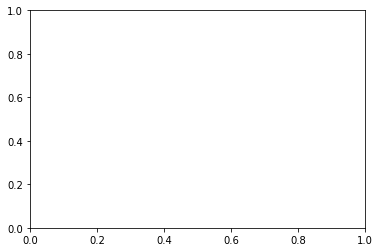

In [40]:
# Define the plot_band_array function from Day 1
def plot_band_array(band_array,refl_extent,colorlimit,ax=plt.gca(),title='',cbar ='on',cmap_title='',colormap='BuGn'):
    plot = plt.imshow(band_array,extent=refl_extent,clim=colorlimit); 
    if cbar == 'on':
        cbar = plt.colorbar(plot,aspect=40); plt.set_cmap(colormap); 
        cbar.set_label(cmap_title,rotation=90,labelpad=20);
    plt.title(title); ax = plt.gca(); 
    ax.ticklabel_format(useOffset=False, style='plain'); #do not use scientific notation #
    rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90); #rotate x tick labels 90 degrees

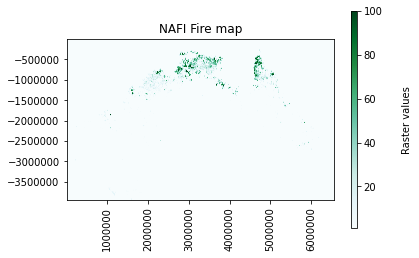

In [41]:
plot_band_array(chm_array,chm_ext,(1,100),title='NAFI Fire map',cmap_title='Raster values')

Text(0, 0.5, 'Relative Frequency')

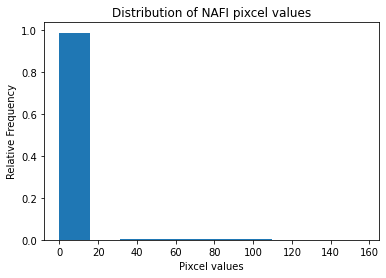

In [42]:
import copy
chm_nonan_array = copy.copy(chm_array)
chm_nonan_array = chm_nonan_array[~np.isnan(chm_array)]
plt.hist(chm_nonan_array,weights=np.zeros_like(chm_nonan_array)+1./
         (chm_array.shape[0]*chm_array.shape[1]),bins=10);
plt.title('Distribution of NAFI pixcel values')
plt.xlabel('Pixcel values'); plt.ylabel('Relative Frequency')

min: 1.0 m
max: 157.0 m
mean: 69.08 m


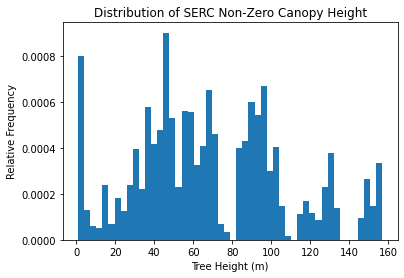

In [43]:
chm_nonzero_array = copy.copy(chm_array)
chm_nonzero_array[chm_array==0]=np.nan
chm_nonzero_nonan_array = chm_nonzero_array[~np.isnan(chm_nonzero_array)]
# Use weighting to plot relative frequency
plt.hist(chm_nonzero_nonan_array,weights=np.zeros_like(chm_nonzero_nonan_array)+1./
         (chm_array.shape[0]*chm_array.shape[1]),bins=50);

# plt.hist(chm_nonzero_nonan_array.flatten(),50) 
plt.title('Distribution of SERC Non-Zero Canopy Height')
plt.xlabel('Tree Height (m)'); plt.ylabel('Relative Frequency')
# plt.xlim(0,25); plt.ylim(0,4000000)

print('min:',np.amin(chm_nonzero_nonan_array),'m')
print('max:',round(np.amax(chm_nonzero_nonan_array),2),'m')
print('mean:',round(np.mean(chm_nonzero_nonan_array),2),'m')

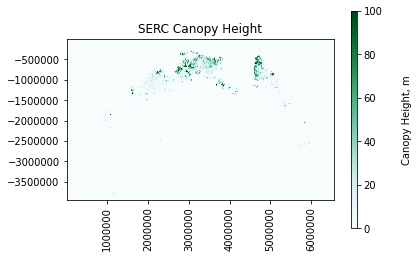

In [44]:
plot_band_array(chm_array,chm_ext,(0,100),title='SERC Canopy Height',cmap_title='Canopy Height, m',colormap='BuGn')

In [45]:
# raster2array.py reads in the first band of geotif file and returns an array and associated 
# metadata dictionary

import numpy as np
import gdal
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from osgeo import gdal
import numpy as np
import copy



def raster2array(geotif_file):
    metadata = {}
    dataset = gdal.Open(geotif_file)
    metadata['array_rows'] = dataset.RasterYSize
    metadata['array_cols'] = dataset.RasterXSize
    metadata['bands'] = dataset.RasterCount
    metadata['driver'] = dataset.GetDriver().LongName
    metadata['projection'] = dataset.GetProjection()
    metadata['geotransform'] = dataset.GetGeoTransform()

    mapinfo = dataset.GetGeoTransform()
    metadata['pixelWidth'] = mapinfo[1]
    metadata['pixelHeight'] = mapinfo[5]

    metadata['ext_dict'] = {}
    metadata['ext_dict']['xMin'] = mapinfo[0]
    metadata['ext_dict']['xMax'] = mapinfo[0] + dataset.RasterXSize/mapinfo[1]
    metadata['ext_dict']['yMin'] = mapinfo[3] + dataset.RasterYSize/mapinfo[5]
    metadata['ext_dict']['yMax'] = mapinfo[3]

    metadata['extent'] = (metadata['ext_dict']['xMin'],metadata['ext_dict']['xMax'],
                          metadata['ext_dict']['yMin'],metadata['ext_dict']['yMax'])

    if metadata['bands'] == 1:
        raster = dataset.GetRasterBand(1)
        metadata['noDataValue'] = raster.GetNoDataValue()
        metadata['scaleFactor'] = raster.GetScale()

        # band statistics
        metadata['bandstats'] = {} #make a nested dictionary to store band stats in same 
        stats = raster.GetStatistics(True,True)
        metadata['bandstats']['min'] = round(stats[0],2)
        metadata['bandstats']['max'] = round(stats[1],2)
        metadata['bandstats']['mean'] = round(stats[2],2)
        metadata['bandstats']['stdev'] = round(stats[3],2)

        array = dataset.GetRasterBand(1).ReadAsArray(0,0,metadata['array_cols'],metadata['array_rows']).astype(np.float)
        array[array==int(metadata['noDataValue'])]=np.nan
        array = array/metadata['scaleFactor']
        return array, metadata

    elif metadata['bands'] > 1:
        print('More than one band ... need to modify function for case of multiple bands')

In [46]:
NAFI_array, NAFI_metadata = raster2array(r"Z:\Scratch\Zonal_Stats_Pipeline\Firescars\NAFI_fire_rasters_v2\fs2020.tif")

print('NAFI_Array: ',NAFI_array)

#print metadata in alphabetical order
for item in sorted(NAFI_metadata):
    print(item + ':', NAFI_metadata[item])

NAFI_Array:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
array_cols: 16431
array_rows: 9868
bands: 1
bandstats: {'min': 0.0, 'max': 157.0, 'mean': 1.03, 'stdev': 9.61}
driver: GeoTIFF
ext_dict: {'xMin': 112.9225, 'xMax': 6572512.9225, 'yMin': -3947209.33, 'yMax': -9.329999999999998}
extent: (112.9225, 6572512.9225, -3947209.33, -9.329999999999998)
geotransform: (112.9225, 0.0025, 0.0, -9.329999999999998, 0.0, -0.0025)
noDataValue: 255.0
pixelHeight: -0.0025
pixelWidth: 0.0025
projection: GEOGCS["GCS_GDA_1994",DATUM["GDA_1994",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]]
scaleFactor: 1.0


Min: 1.0
Max: 255.0
Mean: 251.44


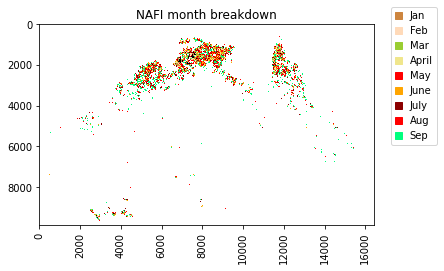

In [47]:


NAFI_reclass = copy.copy(NAFI_array)
NAFI_reclass[np.where(NAFI_array== 0)] = 255 # Class No data
NAFI_reclass[np.where((NAFI_array>=1) & (NAFI_array<=8))] = 1 #  Class Jan
NAFI_reclass[np.where((NAFI_array>=8) & (NAFI_array<=16))] = 2 #  Class Feb
NAFI_reclass[np.where((NAFI_array>=17) & (NAFI_array<=26))] = 3 # March
NAFI_reclass[np.where((NAFI_array>=27) & (NAFI_array<=36))] = 4 #  April
NAFI_reclass[np.where((NAFI_array>=37) & (NAFI_array<=55))] = 5 #  Class May
NAFI_reclass[np.where((NAFI_array>=56) & (NAFI_array<=84))] = 6 #  Class June
NAFI_reclass[np.where((NAFI_array>=85) & (NAFI_array<=115))] = 7 #  Class July
NAFI_reclass[np.where((NAFI_array>=116) & (NAFI_array<=145))] = 8 #  Class August
NAFI_reclass[np.where((NAFI_array>=146) & (NAFI_array<=175))] = 9 #  Class September
NAFI_reclass[np.where((NAFI_array>=176) & (NAFI_array<=205))] = 10 #  Class October
NAFI_reclass[np.where((NAFI_array>=206) & (NAFI_array<=231))] = 11 #  Class November
NAFI_reclass[np.where((NAFI_array>=232) & (NAFI_array<=255))] = 12 #  Class December
#NAFI_reclass[np.where(NAFI_array>=176)] = 255 #  Class No data
"""NAFI_reclass[np.where((NAFI_array>206) & (NAFI_array<=231))] = 11 #  Class November
NAFI_reclass[np.where((NAFI_array>232) & (NAFI_array<=254))] = 12 #  Class December"""
#NAFI_reclass[np.where(NAFI_array== 0)] = 10 # Class No data

print('Min:',np.nanmin(NAFI_reclass))
print('Max:',np.nanmax(NAFI_reclass))
print('Mean:',round(np.nanmean(NAFI_reclass),2))


import matplotlib.colors as colors
plt.figure(); #ax = plt.subplots()
cmapNAFI = colors.ListedColormap([
    'black',
    'peru',
    'peachpuff',
    'yellowgreen',
    'khaki',
    'red',
    'orange',
    'darkred',
    'red',
    'springgreen',
    'white'
])

extents=[6000,1200,0,500]

plt.imshow(NAFI_reclass,  cmap=cmapNAFI) #extent=extents,
plt.title('NAFI month breakdown')
ax=plt.gca(); ax.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation 
rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90) #rotate x tick labels 90 degrees
# forceAspect(ax,aspect=1) # ax.set_aspect('auto')

# Create custom legend to label the four canopy height classes:
import matplotlib.patches as mpatches
class1_box = mpatches.Patch(color='peru', label='Jan')
class2_box = mpatches.Patch(color='peachpuff', label='Feb')
class3_box = mpatches.Patch(color='yellowgreen', label='Mar')
class4_box = mpatches.Patch(color='khaki', label='April')
class5_box = mpatches.Patch(color='red', label='May')
class6_box = mpatches.Patch(color='orange', label='June')
class7_box = mpatches.Patch(color='darkred', label='July')
class8_box = mpatches.Patch(color='red', label='Aug')
class9_box = mpatches.Patch(color='springgreen', label='Sep')
class10_box = mpatches.Patch(color='blue', label='Oct')
#class11_box = mpatches.Patch(color='tan', label='Nov')
#class12_box = mpatches.Patch(color='maroon', label='Dec')
#class13_box = mpatches.Patch(color='red', label='No data')
#class14_box = mpatches.Patch(color='black', label='255')



ax.legend(handles=[class1_box,class2_box,class3_box,class4_box, class5_box, class6_box,
                  class7_box,class8_box,class9_box],
          handlelength=0.7,bbox_to_anchor=(1.05, 0.4),loc='lower left',borderaxespad=0.)

In [48]:
# %load ../hyperspectral_hdf5/array2raster.py
"""
Array to Raster Function from https://pcjericks.github.io/py-gdalogr-cookbook/raster_layers.html)
"""
import gdal, osr #ogr, os, osr
import numpy as np

def array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array,epsg):

    cols = array.shape[1]
    rows = array.shape[0]
    originX = rasterOrigin[0]
    originY = rasterOrigin[1]

    driver = gdal.GetDriverByName('GTiff')
    outRaster = driver.Create(newRasterfn, cols, rows, 1, gdal.GDT_Byte)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))
    outband = outRaster.GetRasterBand(1)
    outband.WriteArray(array)
    outRasterSRS = osr.SpatialReference()
    outRasterSRS.ImportFromEPSG(epsg)
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    outband.FlushCache()

In [50]:
# array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array)
epsg = 4283   # GDA94 
rasterOrigin = (NAFI_metadata['ext_dict']['xMin'],NAFI_metadata['ext_dict']['yMax'])
print('raster origin:',rasterOrigin)
array2raster('NAFI_Classifiedtest2.tif',rasterOrigin,1,-1,NAFI_reclass,epsg)

raster origin: (112.9225, -9.329999999999998)


Full classification code

In [ ]:
# raster2array.py reads in the first band of geotif file and returns an array and associated 
# metadata dictionary

import numpy as np
import gdal
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from osgeo import gdal
import numpy as np
import copy
#import matplotlib.colors as colors
import gdal, osr #ogr, os, osr
import numpy as np



def raster2array(geotif_file):
    metadata = {}
    dataset = gdal.Open(geotif_file)
    metadata['array_rows'] = dataset.RasterYSize
    metadata['array_cols'] = dataset.RasterXSize
    metadata['bands'] = dataset.RasterCount
    metadata['driver'] = dataset.GetDriver().LongName
    metadata['projection'] = dataset.GetProjection()
    metadata['geotransform'] = dataset.GetGeoTransform()

    mapinfo = dataset.GetGeoTransform()
    metadata['pixelWidth'] = mapinfo[1]
    metadata['pixelHeight'] = mapinfo[5]

    metadata['ext_dict'] = {}
    metadata['ext_dict']['xMin'] = mapinfo[0]
    metadata['ext_dict']['xMax'] = mapinfo[0] + dataset.RasterXSize/mapinfo[1]
    metadata['ext_dict']['yMin'] = mapinfo[3] + dataset.RasterYSize/mapinfo[5]
    metadata['ext_dict']['yMax'] = mapinfo[3]

    metadata['extent'] = (metadata['ext_dict']['xMin'],metadata['ext_dict']['xMax'],
                          metadata['ext_dict']['yMin'],metadata['ext_dict']['yMax'])

    if metadata['bands'] == 1:
        raster = dataset.GetRasterBand(1)
        metadata['noDataValue'] = raster.GetNoDataValue()
        metadata['scaleFactor'] = raster.GetScale()

        # band statistics
        metadata['bandstats'] = {} #make a nested dictionary to store band stats in same 
        stats = raster.GetStatistics(True,True)
        metadata['bandstats']['min'] = round(stats[0],2)
        metadata['bandstats']['max'] = round(stats[1],2)
        metadata['bandstats']['mean'] = round(stats[2],2)
        metadata['bandstats']['stdev'] = round(stats[3],2)

        array = dataset.GetRasterBand(1).ReadAsArray(0,0,metadata['array_cols'],metadata['array_rows']).astype(np.float)
        array[array==int(metadata['noDataValue'])]=np.nan
        array = array/metadata['scaleFactor']
        return array, metadata

    elif metadata['bands'] > 1:
        print('More than one band ... need to modify function for case of multiple bands')
        
        
NAFI_array, NAFI_metadata = raster2array(r"Z:\Scratch\Zonal_Stats_Pipeline\Firescars\NAFI_fire_rasters_v2\fs2020.tif")

print('NAFI_Array: ',NAFI_array)

#print metadata in alphabetical order
for item in sorted(NAFI_metadata):
    print(item + ':', NAFI_metadata[item])

    NAFI_reclass = copy.copy(NAFI_array)
NAFI_reclass[np.where(NAFI_array== 0)] = 255 # Class No data
NAFI_reclass[np.where((NAFI_array>=1) & (NAFI_array<=8))] = 1 #  Class Jan
NAFI_reclass[np.where((NAFI_array>=8) & (NAFI_array<=16))] = 2 #  Class Feb
NAFI_reclass[np.where((NAFI_array>=17) & (NAFI_array<=26))] = 3 # March
NAFI_reclass[np.where((NAFI_array>=27) & (NAFI_array<=36))] = 4 #  April
NAFI_reclass[np.where((NAFI_array>=37) & (NAFI_array<=55))] = 5 #  Class May
NAFI_reclass[np.where((NAFI_array>=56) & (NAFI_array<=84))] = 6 #  Class June
NAFI_reclass[np.where((NAFI_array>=85) & (NAFI_array<=115))] = 7 #  Class July
NAFI_reclass[np.where((NAFI_array>=116) & (NAFI_array<=145))] = 8 #  Class August
NAFI_reclass[np.where((NAFI_array>=146) & (NAFI_array<=175))] = 9 #  Class September
NAFI_reclass[np.where((NAFI_array>=176) & (NAFI_array<=205))] = 10 #  Class October
NAFI_reclass[np.where((NAFI_array>=206) & (NAFI_array<=231))] = 11 #  Class November
NAFI_reclass[np.where((NAFI_array>=232) & (NAFI_array<=255))] = 12 #  Class December
#NAFI_reclass[np.where(NAFI_array>=176)] = 255 #  Class No data
"""NAFI_reclass[np.where((NAFI_array>206) & (NAFI_array<=231))] = 11 #  Class November
NAFI_reclass[np.where((NAFI_array>232) & (NAFI_array<=254))] = 12 #  Class December"""
#NAFI_reclass[np.where(NAFI_array== 0)] = 10 # Class No data

print('Min:',np.nanmin(NAFI_reclass))
print('Max:',np.nanmax(NAFI_reclass))
print('Mean:',round(np.nanmean(NAFI_reclass),2))


#plt.figure(); #ax = plt.subplots()
"""cmapNAFI = colors.ListedColormap([
    'black',
    'peru',
    'peachpuff',
    'yellowgreen',
    'khaki',
    'red',
    'orange',
    'darkred',
    'red',
    'springgreen',
    'white'
])

extents=[6000,1200,0,500]

plt.imshow(NAFI_reclass,  cmap=cmapNAFI) #extent=extents,
plt.title('NAFI month breakdown')
ax=plt.gca(); ax.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation 
rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90) #rotate x tick labels 90 degrees
# forceAspect(ax,aspect=1) # ax.set_aspect('auto')"""

# Create custom legend to label the four canopy height classes:
"""import matplotlib.patches as mpatches
class1_box = mpatches.Patch(color='peru', label='Jan')
class2_box = mpatches.Patch(color='peachpuff', label='Feb')
class3_box = mpatches.Patch(color='yellowgreen', label='Mar')
class4_box = mpatches.Patch(color='khaki', label='April')
class5_box = mpatches.Patch(color='red', label='May')
class6_box = mpatches.Patch(color='orange', label='June')
class7_box = mpatches.Patch(color='darkred', label='July')
class8_box = mpatches.Patch(color='red', label='Aug')
class9_box = mpatches.Patch(color='springgreen', label='Sep')
class10_box = mpatches.Patch(color='blue', label='Oct')
#class11_box = mpatches.Patch(color='tan', label='Nov')
#class12_box = mpatches.Patch(color='maroon', label='Dec')
#class13_box = mpatches.Patch(color='red', label='No data')
#class14_box = mpatches.Patch(color='black', label='255')



ax.legend(handles=[class1_box,class2_box,class3_box,class4_box, class5_box, class6_box,
                  class7_box,class8_box,class9_box],
          handlelength=0.7,bbox_to_anchor=(1.05, 0.4),loc='lower left',borderaxespad=0.)"""

# %load ../hyperspectral_hdf5/array2raster.py
"""
Array to Raster Function from https://pcjericks.github.io/py-gdalogr-cookbook/raster_layers.html)
"""


def array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array,epsg):

    cols = array.shape[1]
    rows = array.shape[0]
    originX = rasterOrigin[0]
    originY = rasterOrigin[1]

    driver = gdal.GetDriverByName('GTiff')
    outRaster = driver.Create(newRasterfn, cols, rows, 1, gdal.GDT_Byte)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))
    outband = outRaster.GetRasterBand(1)
    outband.WriteArray(array)
    outRasterSRS = osr.SpatialReference()
    outRasterSRS.ImportFromEPSG(epsg)
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    outband.FlushCache()
    
# array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array)
epsg = 4283   # GDA94 
rasterOrigin = (NAFI_metadata['ext_dict']['xMin'],NAFI_metadata['ext_dict']['yMax'])
print('raster origin:',rasterOrigin)
array2raster('NAFI_Classifiedtest2.tif',rasterOrigin,1,-1,NAFI_reclass,epsg)
print('----------------------\n script has finished \n ----------------')